In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [5]:
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

In [6]:
df.head(4)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I


## dataset analysis and visualization ##

In [ ]:
new_csv = df

new_csv['SCC'] = new_csv['SCC'].map({'yes':1, 'no':0})
new_csv['FAVC'] = new_csv['FAVC'].map({'yes':1, 'no':0})
new_csv['family_history_with_overweight'] = new_csv['family_history_with_overweight'].map({'yes':1, 'no':0})
new_csv['SMOKE'] = new_csv['SMOKE'].map({'yes':1, 'no':0})
new_csv['CAEC'] = new_csv['CAEC'].map({'Sometimes':1, 'no':0, 'Frequently':2, 'Always':3})
new_csv['CALC'] = new_csv['CALC'].map({'Sometimes':1, 'no':0, 'Frequently':2, 'Always':3})
new_csv['MTRANS'] = new_csv['MTRANS'].map({'Automobile':0, 'Bike':1, 'Motorbike':2, 'Public_Transportation':3, 'Walking':4})
new_csv['Gender'] = new_csv['Gender'].map({'Male':0, 'Female':1})
new_csv['NObeyesdad'] = new_csv['NObeyesdad'].map({'Insufficient_Weight':0, 'Normal_Weight':1, 'Overweight_Level_I':2, 'Overweight_Level_II':2, 'Obesity_Type_I':3, 'Obesity_Type_II':4, 'Obesity_Type_III':4})

new_csv.to_csv('Obesitas Dataset (clean).csv', index=False)

In [73]:
# df = df.fillna(0)
new_csv.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

## SPLIT FITUR DAN LABEL

In [74]:
features = ["Gender", "Age", "Height", "Weight", "family_history_with_overweight", "FAVC", "FCVC", "NCP", "CAEC", "SMOKE", "CH2O", "SCC", "FAF", "TUE", "CALC", "MTRANS"]
X = new_csv[features]
y = new_csv["NObeyesdad"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

## NORMALISASI DATA

In [75]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Membuat Model Dengan Algoritma Logistik Regresi

In [76]:
model = LogisticRegression(random_state=16)

## Melatih Model dengan Data

In [77]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## Melihat hasil akurasi

In [78]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi: {accuracy * 100:.2f}%')

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

print('Classification Report:')
print(classification_report(y_test, y_pred))

Akurasi: 86.55%
Confusion Matrix:
[[62  2  0  0  0  0  0]
 [11 53  8  1  0  0  0]
 [ 0  7 51 10  1  0  0]
 [ 0  1  7 58  2  0  1]
 [ 0  0  1  2 76 13  0]
 [ 0  0  0  0  3 73  1]
 [ 0  0  0  0  0  0 84]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.97      0.91        64
           1       0.84      0.73      0.78        73
           2       0.76      0.74      0.75        69
           3       0.82      0.84      0.83        69
           4       0.93      0.83      0.87        92
           5       0.85      0.95      0.90        77
           6       0.98      1.00      0.99        84

    accuracy                           0.87       528
   macro avg       0.86      0.86      0.86       528
weighted avg       0.87      0.87      0.86       528



Predicted Classes: [4 3 4 5 6 3 2 2 2 5 4 2 6 5 4 6 1 4 3 0 0 3 6 0 5 5 0 6 2 0 6 1 6 4 2 4 5
 4 0 3 1 0 5 0 6 6 1 6 3 5 5 3 4 1 6 0 5 4 4 0 1 2 6 4 0 5 1 3 5 1 6 4 0 1
 2 0 5 6 5 3 0 2 6 4 6 6 4 4 1 3 3 4 0 1 5 1 0 1 0 3 6 4 5 3 3 6 4 3 4 6 2
 6 5 5 5 0 0 2 5 0 6 2 1 3 6 2 2 4 6 5 5 6 3 5 2 4 1 1 3 2 6 6 3 1 6 1 6 5
 5 3 4 0 6 6 6 1 2 5 0 5 5 6 4 2 1 0 1 1 3 1 2 3 6 2 3 5 1 0 4 5 4 2 2 0 1
 6 4 6 5 6 6 2 0 1 0 2 5 5 6 6 0 3 0 5 0 4 6 1 4 1 2 6 2 2 6 1 2 5 3 2 4 0
 1 1 5 3 4 5 0 5 3 0 2 4 5 4 5 3 3 4 6 2 5 2 4 2 4 3 1 4 1 2 6 1 0 0 0 0 5
 2 3 5 0 2 3 1 0 4 6 4 2 4 5 6 5 0 1 5 6 0 0 4 0 5 5 6 5 4 4 2 2 2 3 2 6 5
 4 6 4 5 6 3 3 1 5 6 2 5 4 1 5 1 5 5 4 6 0 3 5 2 5 2 3 4 3 3 1 6 6 4 2 3 1
 4 3 0 2 0 1 5 6 2 5 2 5 6 2 3 5 4 5 6 3 5 6 5 3 5 5 0 1 4 0 4 2 4 0 0 5 4
 6 3 3 4 3 3 0 4 5 4 2 3 0 1 4 0 3 4 3 4 4 0 4 1 5 6 6 6 6 2 3 1 6 2 3 0 2
 2 6 2 6 4 3 0 0 5 2 2 5 3 3 2 4 0 1 2 3 4 1 6 4 6 3 6 3 5 4 1 4 3 4 4 0 2
 4 1 3 6 1 0 1 2 5 4 4 1 3 6 1 4 1 6 6 0 1 4 6 6 6 5 6 5 3 6 0 6 0 0 2 4 5
 4 5 0

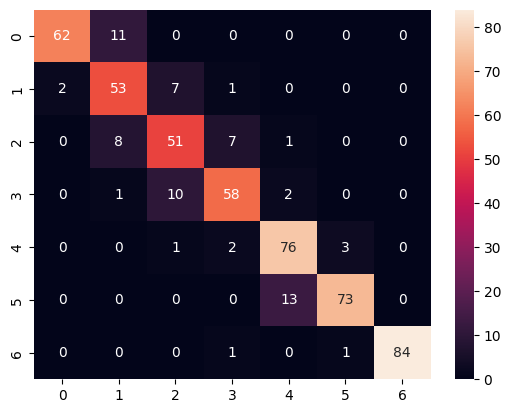

In [94]:
y_pred = model.predict(X_test)
# y_pred_classes = np.argmax(y_pred, axis=2)  # Konversi one-hot encoding ke label
# y_true_classes = np.argmax(y_test, axis=1)

# # Contoh hasil prediksi
print("Predicted Classes:", y_pred)
print("True Classes:", np.array(y_test))

# Confusion matrix
# print("Confusion Matrix:")
# print()
sns.heatmap(confusion_matrix(y_pred, np.array(y_test)), annot=True)

# Classification report
print("Classification Report:")
print(classification_report(y_pred, np.array(y_test)))

In [67]:
df.dtypes

Gender                              int64
Age                                 int64
Height                            float64
Weight                            float64
family_history_with_overweight      int64
FAVC                                int64
FCVC                              float64
NCP                               float64
CAEC                                int64
SMOKE                               int64
CH2O                              float64
SCC                                 int64
FAF                               float64
TUE                               float64
CALC                                int64
MTRANS                              int64
NObeyesdad                          int64
dtype: object

## TES PREDIKSI

In [87]:
# 1, 21, 1.62, 64.0, 1, 0, 2.0, 3.0, 0, 0, 2.0, 0, 0.0, 1.0, 1, 3
# 0, 27, 1.80, 87.0, 0, 0, 3.0, 3.0, 1, 0, 2.0, 0, 2.0, 0.0, 2, 4
# Asli: 1, 27, 164, 60, 0, 0, 1, 3, 3, 0, 3, 0, 2, 3, 1, 4
pasien_obesitas = np.array([[0, 27, 1.80, 87.0, 0, 0, 3.0, 3.0, 1, 0, 2.0, 0, 2.0, 0.0, 2, 4]])
result = model.predict(pasien_obesitas)

if result[0] == 0:
    print("Hasil data menunjukkan anda Insufficient Weight")
elif result[0] == 1:
    print("Hasil data menunjukkan anda  Normal Weight")
elif result[0] == 2:
    print("Hasil data menunjukkan anda Overweight Level I")
elif result[0] == 3:
    print("Hasil data menunjukkan anda Overweight Level II")
elif result[0] == 4:
    print("Hasil data menunjukkan anda Obesity Type I")
elif result[0] == 5:
    print("Hasil data menunjukkan anda Obesity Type II")
elif result[0] == 6:
    print("Hasil data menunjukkan anda Obesity Type III")

Hasil data menunjukkan anda Obesity Type II


In [213]:
pasien_obesitas = np.array([[1, 40, 2.00, 0, 1, 0, 2, 3, 0, 0, 2, 0, 0, 1, 1, 3]])
result = model.predict(pasien_obesitas)
print(result)
if result[0] == 0:
    print("Hasil data menunjukkan anda Insufficient Weight")
elif result[0] == 1:
    print("Hasil data menunjukkan anda  Normal Weight")
elif result[0] == 2:
    print("Hasil data menunjukkan anda Overweight Level I")
elif result[0] == 3:
    print("Hasil data menunjukkan anda Overweight Level II")
elif result[0] == 4:
    print("Hasil data menunjukkan anda Obesity Type I")
elif result[0] == 5:
    print("Hasil data menunjukkan anda Obesity Type II")
elif result[0] == 6:
    print("Hasil data menunjukkan anda Obesity Type III")

[5]
Hasil data menunjukkan anda Obesity Type II
